In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('wearable_health_devices_performance_upto_26june2025.csv')
df.head(),  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Test_Date                        2375 non-null   object 
 1   Device_Name                      2375 non-null   object 
 2   Brand                            2375 non-null   object 
 3   Model                            2375 non-null   object 
 4   Category                         2375 non-null   object 
 5   Price_USD                        2375 non-null   float64
 6   Battery_Life_Hours               2375 non-null   float64
 7   Heart_Rate_Accuracy_Percent      2375 non-null   float64
 8   Step_Count_Accuracy_Percent      2375 non-null   float64
 9   Sleep_Tracking_Accuracy_Percent  2375 non-null   float64
 10  Water_Resistance_Rating          2375 non-null   object 
 11  User_Satisfaction_Rating         2375 non-null   float64
 12  GPS_Accuracy_Meters 

(    Test_Date              Device_Name    Brand            Model  \
 0  2025-06-01         Fitbit Inspire 4   Fitbit        Inspire 4   
 1  2025-06-01         Apple Watch SE 3    Apple       Watch SE 3   
 2  2025-06-01           Fitbit Versa 4   Fitbit          Versa 4   
 3  2025-06-01         Polar Vantage V3    Polar       Vantage V3   
 4  2025-06-01  Samsung Galaxy Watch FE  Samsung  Galaxy Watch FE   
 
           Category  Price_USD  Battery_Life_Hours  \
 0  Fitness Tracker     141.74               129.9   
 1       Smartwatch     834.64                26.5   
 2     Sports Watch     145.34               161.2   
 3       Smartwatch     349.53                69.4   
 4       Smartwatch     502.43                39.7   
 
    Heart_Rate_Accuracy_Percent  Step_Count_Accuracy_Percent  \
 0                        89.69                        93.03   
 1                        95.92                        98.20   
 2                        92.24                        96.81   
 3

In [3]:
# Convert appropriate columns to their correct data types
df['Test_Date'] = pd.to_datetime(df['Test_Date'])

# Convert string-based categorical columns to 'category' dtype
categorical_columns = [
    'Device_Name', 'Brand', 'Model', 'Category',
    'Water_Resistance_Rating', 'Connectivity_Features',
    'App_Ecosystem_Support'
]
df[categorical_columns] = df[categorical_columns].astype('category')

# Display updated data types
df.dtypes

Test_Date                          datetime64[ns]
Device_Name                              category
Brand                                    category
Model                                    category
Category                                 category
Price_USD                                 float64
Battery_Life_Hours                        float64
Heart_Rate_Accuracy_Percent               float64
Step_Count_Accuracy_Percent               float64
Sleep_Tracking_Accuracy_Percent           float64
Water_Resistance_Rating                  category
User_Satisfaction_Rating                  float64
GPS_Accuracy_Meters                       float64
Connectivity_Features                    category
Health_Sensors_Count                        int64
App_Ecosystem_Support                    category
Performance_Score                         float64
dtype: object

In [4]:
df.isnull().sum()

Test_Date                            0
Device_Name                          0
Brand                                0
Model                                0
Category                             0
Price_USD                            0
Battery_Life_Hours                   0
Heart_Rate_Accuracy_Percent          0
Step_Count_Accuracy_Percent          0
Sleep_Tracking_Accuracy_Percent      0
Water_Resistance_Rating              0
User_Satisfaction_Rating             0
GPS_Accuracy_Meters                632
Connectivity_Features                0
Health_Sensors_Count                 0
App_Ecosystem_Support                0
Performance_Score                    0
dtype: int64

In [7]:
df['GPS_Accuracy_Meters'] = df['GPS_Accuracy_Meters'].fillna(df['GPS_Accuracy_Meters'].median())

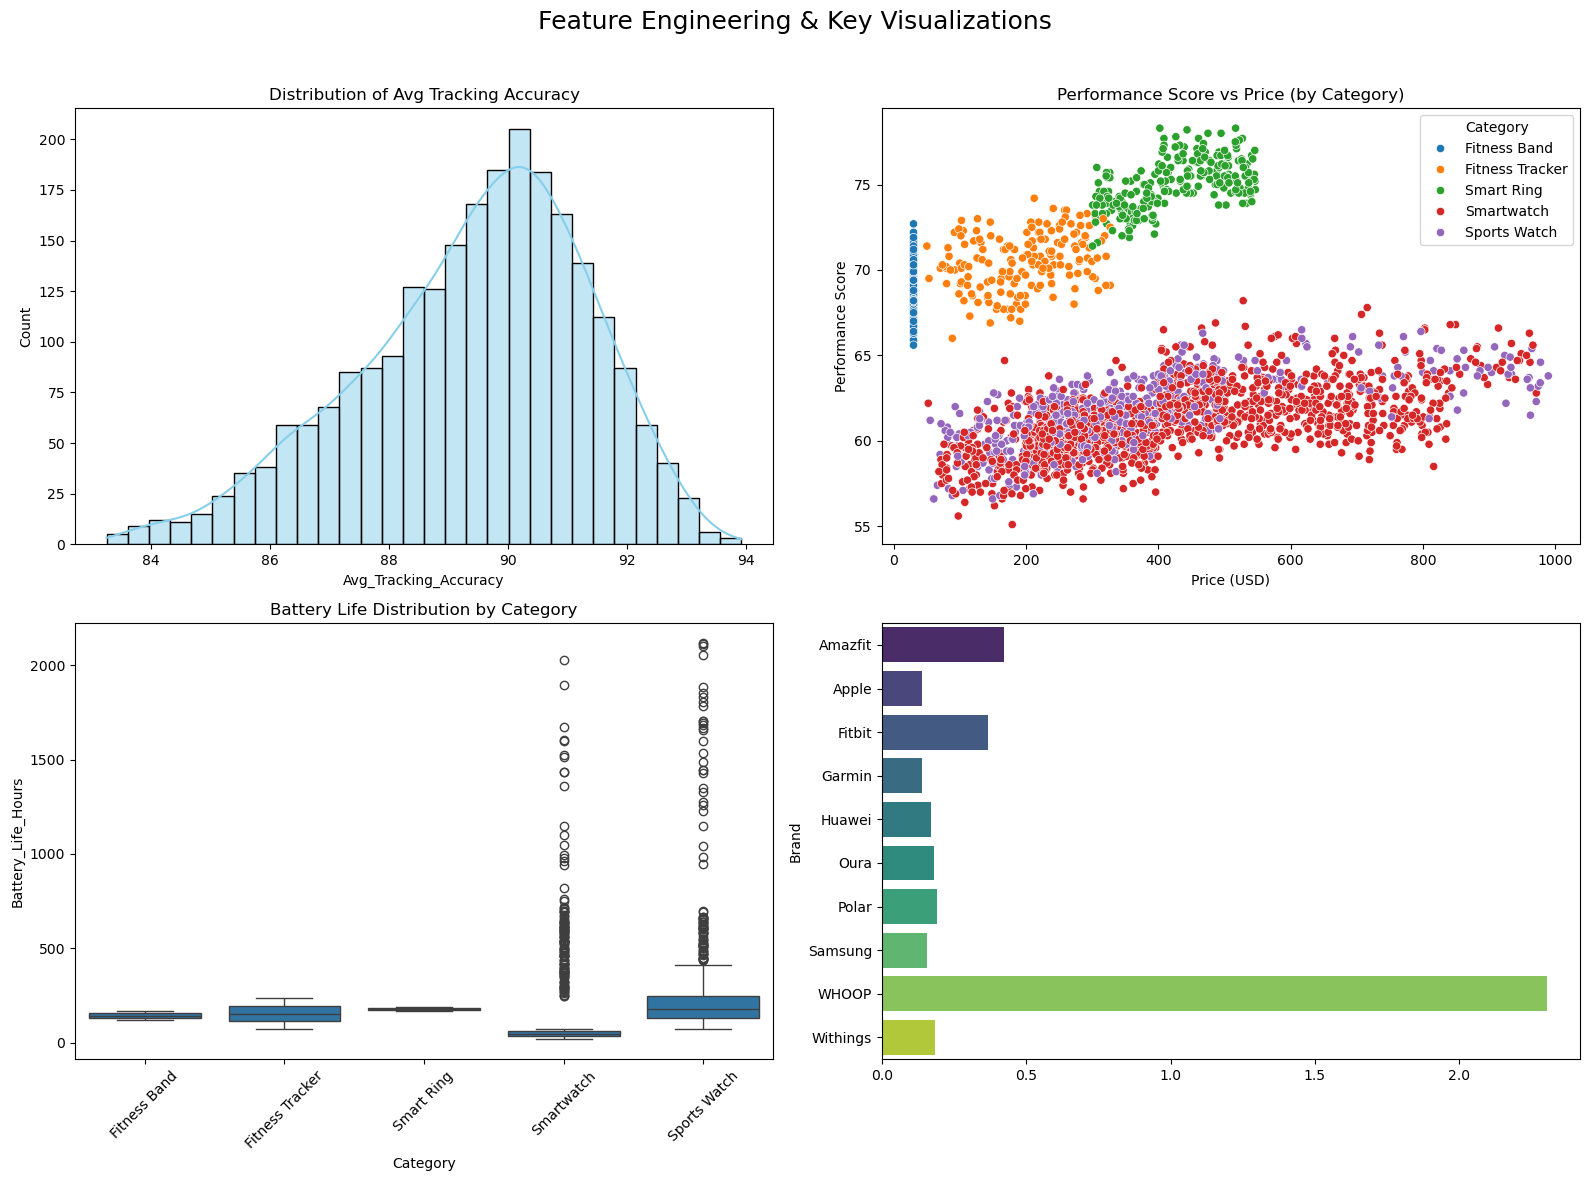

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Engineering
# Create a new feature: Average Accuracy across Heart Rate, Step Count, and Sleep Tracking
df['Avg_Tracking_Accuracy'] = df[
    ['Heart_Rate_Accuracy_Percent', 'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent']
].mean(axis=1)

# Create a new feature: Price-to-Performance Ratio
df['Price_Performance_Ratio'] = df['Performance_Score'] / df['Price_USD']

# Step 2: Visualization Setup
plt.figure(figsize=(16, 12))
plt.suptitle("Feature Engineering & Key Visualizations", fontsize=18)

# Plot 1: Distribution of Average Tracking Accuracy
plt.subplot(2, 2, 1)
sns.histplot(df['Avg_Tracking_Accuracy'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Avg Tracking Accuracy")

# Plot 2: Scatter plot of Performance vs Price
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Price_USD', y='Performance_Score', hue='Category')
plt.title("Performance Score vs Price (by Category)")
plt.xlabel("Price (USD)")
plt.ylabel("Performance Score")

# Plot 3: Boxplot of Battery Life by Category
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Category', y='Battery_Life_Hours')
plt.title("Battery Life Distribution by Category")
plt.xticks(rotation=45)

# Plot 4: Barplot of Average Price_Performance_Ratio by Brand
plt.subplot(2, 2, 4)
avg_ratio_by_brand = (
    df.groupby('Brand', observed=True)['Price_Performance_Ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(
    x=avg_ratio_by_brand.values,
    y=avg_ratio_by_brand.index,
    hue=avg_ratio_by_brand.index,
    palette='viridis',
    dodge=False,
    legend=False
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

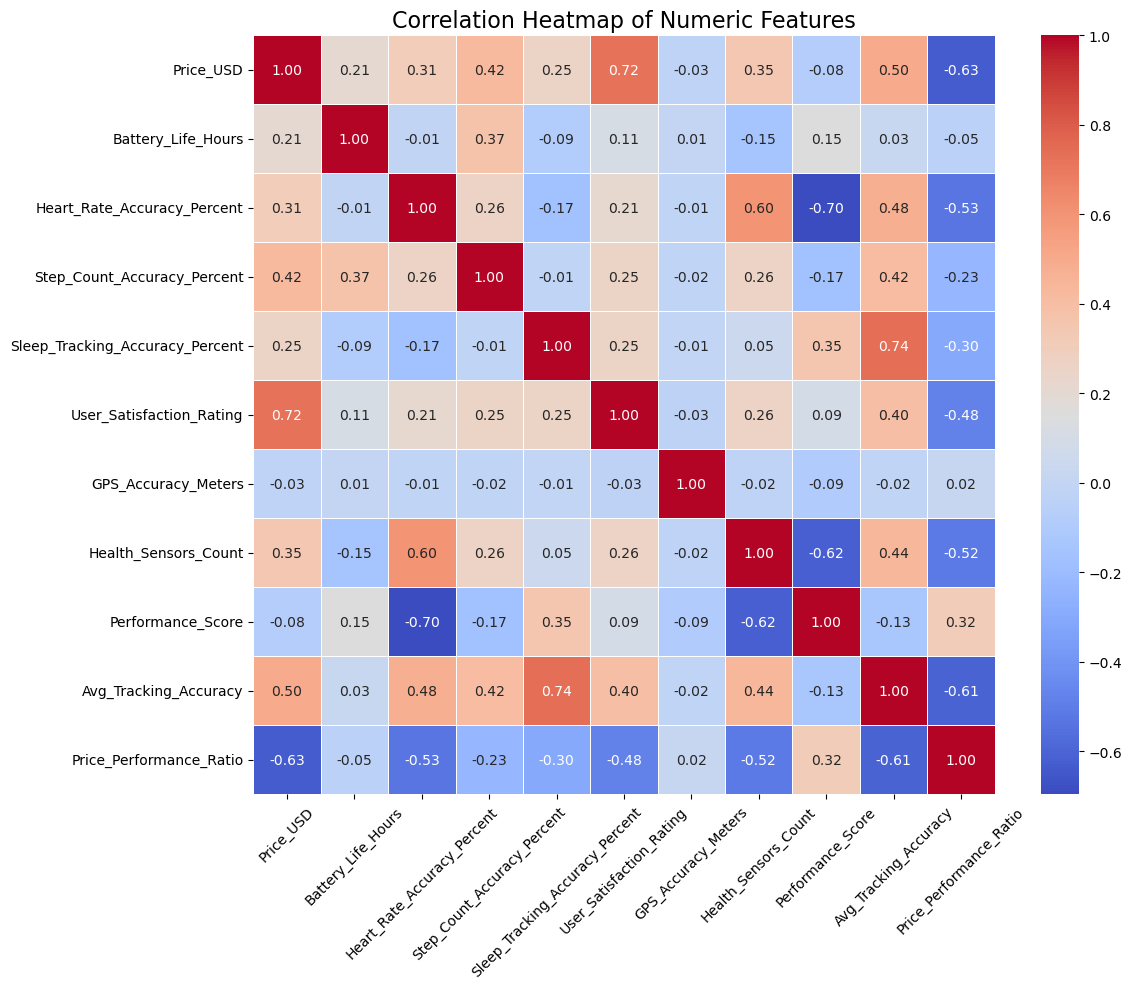

In [12]:
# Select only numeric features for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

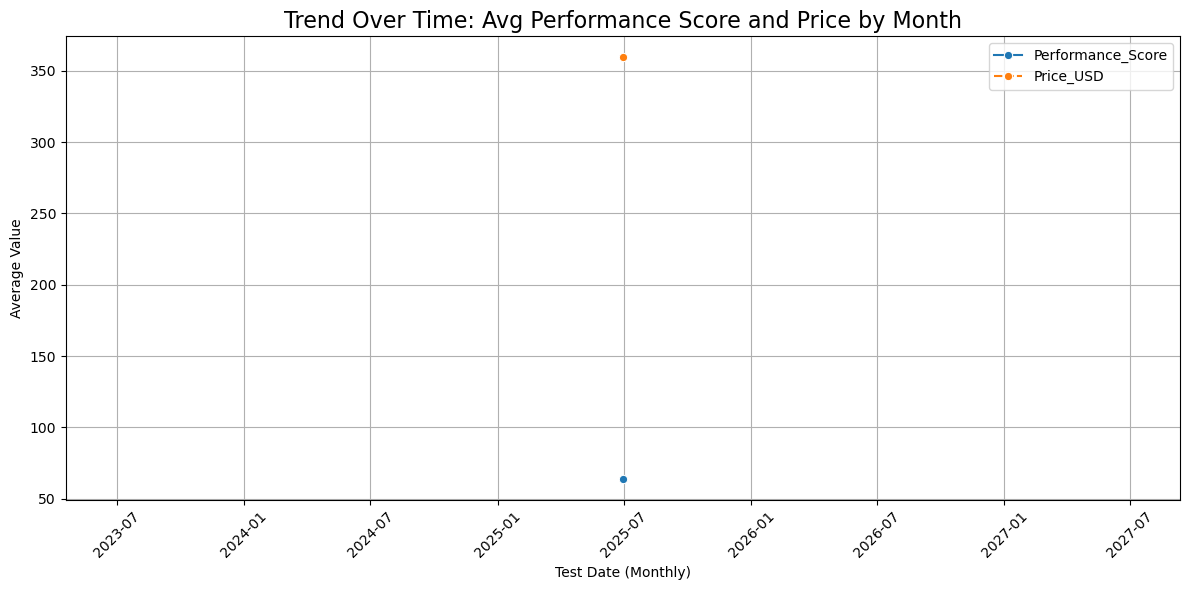

In [14]:
# Ensure Test_Date is datetime
df['Test_Date'] = pd.to_datetime(df['Test_Date'])

# Group by month and compute average Performance Score and Price
trend_df = df.set_index('Test_Date').resample('ME')[['Performance_Score', 'Price_USD']].mean()

# Plot trend lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, marker='o')
plt.title("Trend Over Time: Avg Performance Score and Price by Month", fontsize=16)
plt.xlabel("Test Date (Monthly)")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

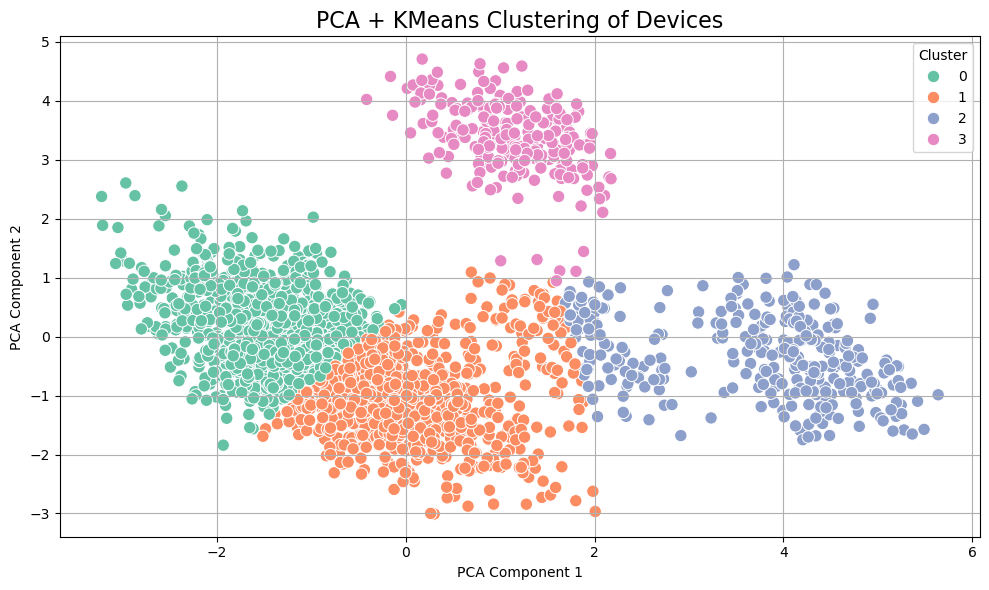

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Select numeric features for PCA and clustering
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Price_USD'])  # drop price for clustering

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Step 3: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Step 5: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set2', s=80)
plt.title("PCA + KMeans Clustering of Devices", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Step 0: Create engineered features
df['Avg_Tracking_Accuracy'] = df[
    ['Heart_Rate_Accuracy_Percent', 'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent']
].mean(axis=1)

df['Price_Performance_Ratio'] = df['Performance_Score'] / df['Price_USD']

# Step 1: Drop non-useful columns (like 'Test_Date', 'Model')
ml_df = df.drop(columns=['Model', 'Test_Date'])

# Step 2: Separate target (optional, e.g., Performance_Score)
X = ml_df.drop(columns=['Performance_Score'])  # Keep this column out if it's your target
y = ml_df['Performance_Score']

# Step 3: Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Step 4: Build preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Step 5: Apply transformations
X_processed = preprocessor.fit_transform(X)

# Optional: Convert to DataFrame
processed_feature_names = (
    numeric_cols.tolist() +
    preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols).tolist()
)
X_ml_ready = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed, columns=processed_feature_names)

# (Optional) Include target
ml_ready_df = X_ml_ready.copy()
ml_ready_df['Performance_Score'] = y.reset_index(drop=True)

# Save or preview
print(ml_ready_df.head())
# ml_ready_df.to_csv("ml_ready_devices.csv", index=False)


   Price_USD  Battery_Life_Hours  Heart_Rate_Accuracy_Percent  \
0  -1.009641           -0.130702                    -1.196284   
1   2.203799           -0.571140                     0.768142   
2  -0.992945            0.002622                    -0.392225   
3  -0.045980           -0.388405                     1.036161   
4   0.663119           -0.514914                    -0.382766   

   Step_Count_Accuracy_Percent  Sleep_Tracking_Accuracy_Percent  \
0                    -1.729710                         0.014968   
1                     1.375146                         0.190490   
2                     0.540378                        -0.897747   
3                    -0.210312                        -0.160554   
4                     1.345118                        -0.744940   

   User_Satisfaction_Rating  GPS_Accuracy_Meters  Health_Sensors_Count  \
0                 -1.763395             0.060236             -1.099347   
1                  0.401041             1.870061          

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split features & target
X = ml_ready_df.drop(columns=['Performance_Score'])
y = ml_ready_df['Performance_Score']

# Step 2: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict & Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 0.12
R-squared (R²): 0.99
